# The influence of professional game reviews and the popularity of a Game.

Before starting, let's make some assumptions!

* Were considered that Twitch data (maximum Peak_viewers, Hours_watched, and Streamers in a day) is a decent game popularity thermometer.

* Were considered that the OpenCritic Hall of Fame represents the rank of best games, according to the most relevant professional game reviewers. Once the OpenCrit compiles 'all' site reviews in a unique score.

* Were just collected data from Twitch of the games that are also in the OpenCritic Hall of Fame


In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Importing the lis of games with both Twitch and OpenCritic Data

In [4]:
df_raw = pd.read_csv('list_of_games.csv')
df_raw.head()

,Unnamed: 0,name,Rank,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,firstReleaseDate,topCriticScore
0,0,Animal Crossing: New Horizons,8,3,2020,30832827,455308,244171,4403,40068,41497,612,67.72,2020-03-20,90
1,1,Animal Crossing: New Horizons,15,4,2020,22494164,519504,130992,1759,38121,31285,722,43.30,2020-03-20,90
2,2,Animal Crossing: New Horizons,24,5,2020,10150782,306001,58370,862,25999,13661,411,33.17,2020-03-20,90
3,3,Animal Crossing: New Horizons,41,6,2020,4530366,169253,24104,541,17257,6300,235,26.77,2020-03-20,90
4,4,Animal Crossing: New Horizons,52,7,2020,3878213,156666,43056,681,16671,5219,210,24.75,2020-03-20,90


In [5]:
#dropping unecessary columns
df_raw.drop('Unnamed: 0', axis=1, inplace=True)
df_raw.head()

,name,Rank,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,firstReleaseDate,topCriticScore
0,Animal Crossing: New Horizons,8,3,2020,30832827,455308,244171,4403,40068,41497,612,67.72,2020-03-20,90
1,Animal Crossing: New Horizons,15,4,2020,22494164,519504,130992,1759,38121,31285,722,43.30,2020-03-20,90
2,Animal Crossing: New Horizons,24,5,2020,10150782,306001,58370,862,25999,13661,411,33.17,2020-03-20,90
3,Animal Crossing: New Horizons,41,6,2020,4530366,169253,24104,541,17257,6300,235,26.77,2020-03-20,90
4,Animal Crossing: New Horizons,52,7,2020,3878213,156666,43056,681,16671,5219,210,24.75,2020-03-20,90


In [6]:
#checking the Dtypes and null values
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              780 non-null    object 
 1   Rank              780 non-null    int64  
 2   Month             780 non-null    int64  
 3   Year              780 non-null    int64  
 4   Hours_watched     780 non-null    int64  
 5   Hours_Streamed    780 non-null    int64  
 6   Peak_viewers      780 non-null    int64  
 7   Peak_channels     780 non-null    int64  
 8   Streamers         780 non-null    int64  
 9   Avg_viewers       780 non-null    int64  
 10  Avg_channels      780 non-null    int64  
 11  Avg_viewer_ratio  780 non-null    float64
 12  firstReleaseDate  780 non-null    object 
 13  topCriticScore    780 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 85.4+ KB


In [8]:
#covnerting object date to datetime format
df_raw['firstReleaseDate'] = pd.to_datetime(df_raw['firstReleaseDate'])
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              780 non-null    object        
 1   Rank              780 non-null    int64         
 2   Month             780 non-null    int64         
 3   Year              780 non-null    int64         
 4   Hours_watched     780 non-null    int64         
 5   Hours_Streamed    780 non-null    int64         
 6   Peak_viewers      780 non-null    int64         
 7   Peak_channels     780 non-null    int64         
 8   Streamers         780 non-null    int64         
 9   Avg_viewers       780 non-null    int64         
 10  Avg_channels      780 non-null    int64         
 11  Avg_viewer_ratio  780 non-null    float64       
 12  firstReleaseDate  780 non-null    datetime64[ns]
 13  topCriticScore    780 non-null    int64         
dtypes: datetime64[ns](1), floa

In [20]:
# Converting Twitch date object datetime format
df_raw['twitch_date'] = pd.to_datetime(df_raw['Year'].astype(str) +'/'+ df_raw['Month'].astype(str) +'/'+'01')
# Removing redundant columns 
df_raw = df_raw.loc[:, ['name', 'Rank', 'twitch_date', 'Hours_watched', 'Hours_Streamed',
       'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers',
       'Avg_channels', 'Avg_viewer_ratio', 'firstReleaseDate',
       'topCriticScore']]
df_raw

,name,Rank,twitch_date,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,firstReleaseDate,topCriticScore
0,Animal Crossing: New Horizons,8,2020-03-01,30832827,455308,244171,4403,40068,41497,612,67.72,2020-03-20,90
1,Animal Crossing: New Horizons,15,2020-04-01,22494164,519504,130992,1759,38121,31285,722,43.30,2020-03-20,90
2,Animal Crossing: New Horizons,24,2020-05-01,10150782,306001,58370,862,25999,13661,411,33.17,2020-03-20,90
3,Animal Crossing: New Horizons,41,2020-06-01,4530366,169253,24104,541,17257,6300,235,26.77,2020-03-20,90
4,Animal Crossing: New Horizons,52,2020-07-01,3878213,156666,43056,681,16671,5219,210,24.75,2020-03-20,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,Uncharted 4: A Thief's End,192,2017-04-01,129993,21675,1665,65,3110,180,30,6.00,2016-05-10,93
776,Uncharted 4: A Thief's End,171,2017-06-01,166236,20712,6514,63,4261,231,28,8.03,2016-05-10,93
777,Uncharted 4: A Thief's End,157,2017-08-01,234356,20074,11747,60,3796,315,27,11.67,2016-05-10,93
778,What Remains of Edith Finch,186,2017-04-01,134691,769,45323,26,271,187,1,175.15,2017-04-25,88


# Correlation analysis

I found out that most of Twitch features are strongly correlated, as expected. It's hard to inferer couse/consequences here, because we can't answer questions like this:

* The number of Streamers increase the number of hours whatched, ou the hours whatched encourages new streamers? I think both hypotesis are real, but I can't proof.


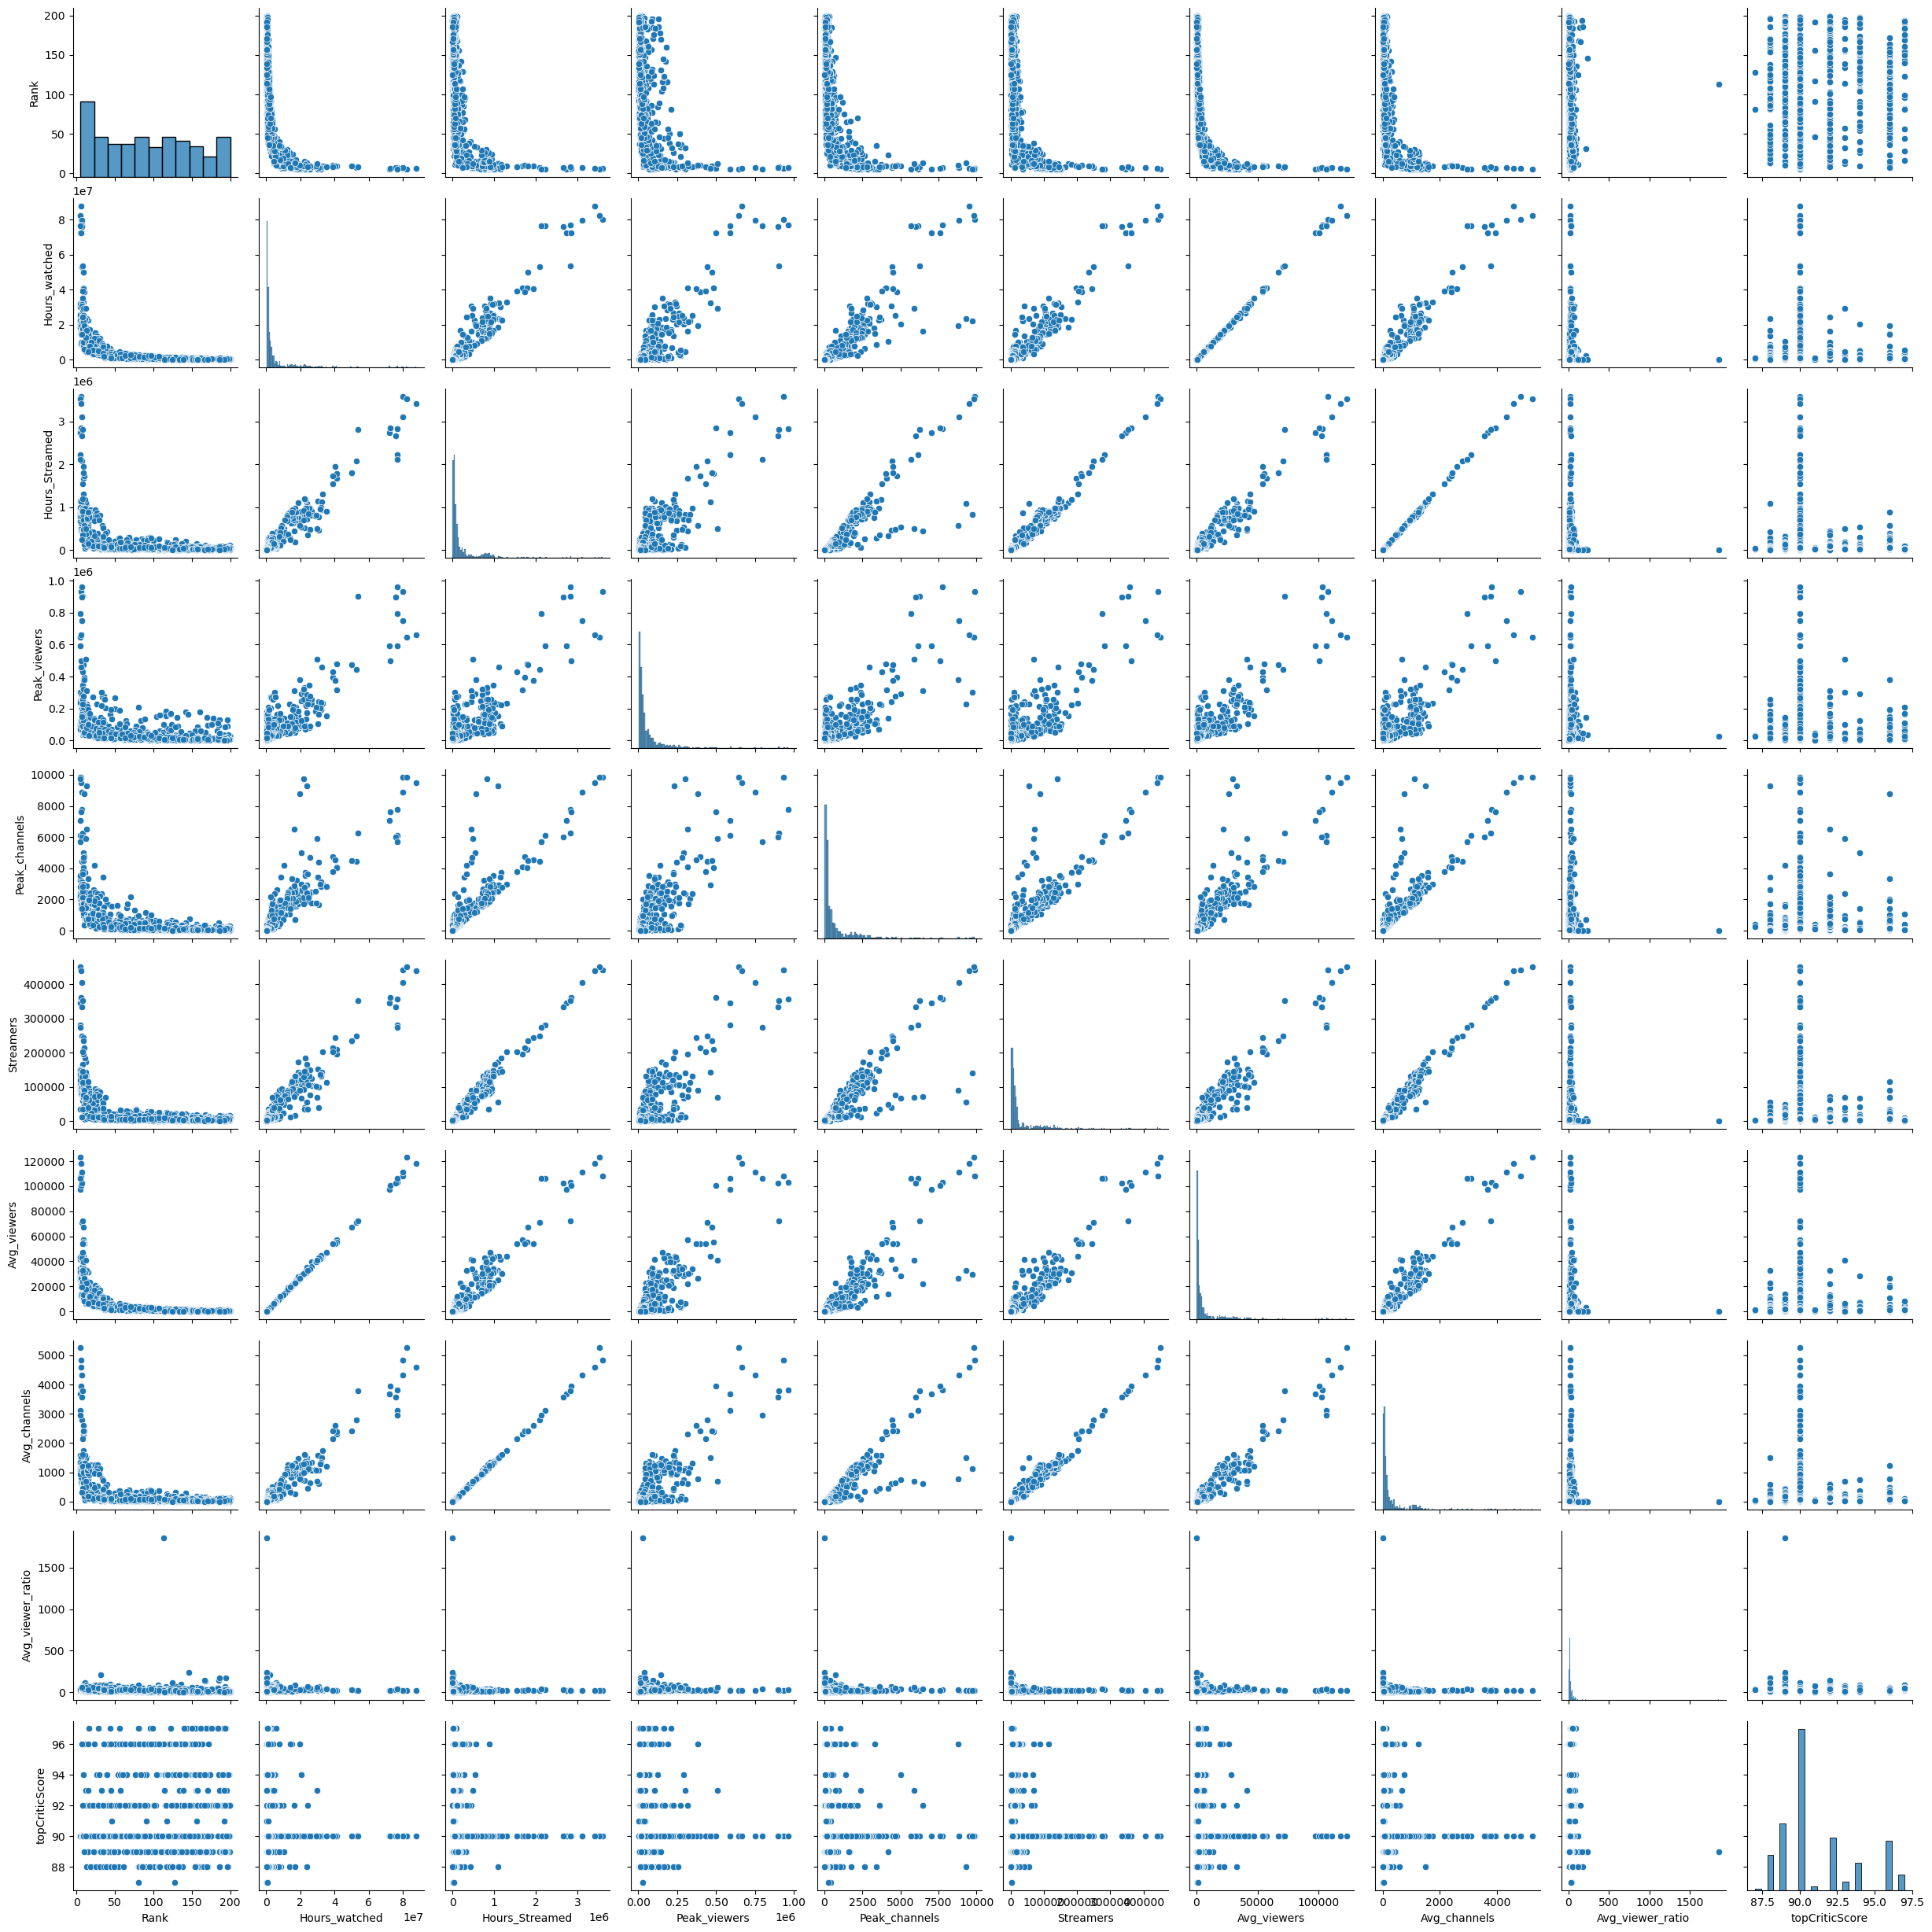

In [166]:
# taking a visual look in features correlation
sns.pairplot(df_raw.drop('name', axis=1))

Let's check the specificaly the correlation between Twitch best RANK and Top OpenCritic Score.

We can see that there is weak correlation, giving us a clue to answer our main question

In [41]:
df_top_ranks = df_raw.groupby(['topCriticScore','name']).agg({'Rank':'min'}).reset_index().sort_values('topCriticScore', ascending=False)

                topCriticScore      Rank
topCriticScore        1.000000 -0.272262
Rank                 -0.272262  1.000000


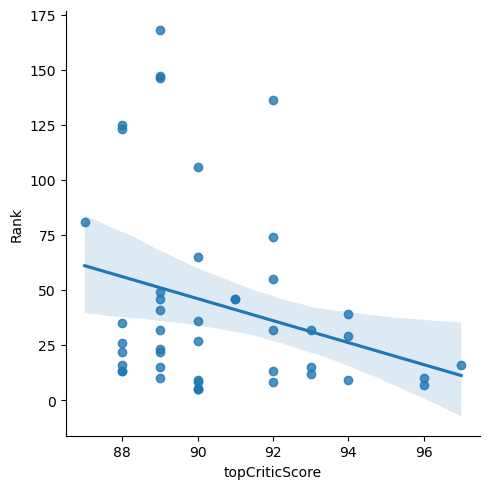

In [171]:
print(df_top_ranks[['topCriticScore','Rank']].corr())

g = sns.lmplot(x="topCriticScore", y="Rank", data=df_top_ranks,
               palette='vdf', y_jitter=.02, logistic=False)

As showed before, in pairplot, we can see a high correlation between Twitch correlation. 

An exaplanation: the Rank/topCriticScore correlation here is 0.17 different from we just seen above -0.27. 

The reason for the difference is that in the first correlation measure I consider just the best Twitch rank reached by the game. And in the second correlation measure I consider the day by day Twitch rank. 

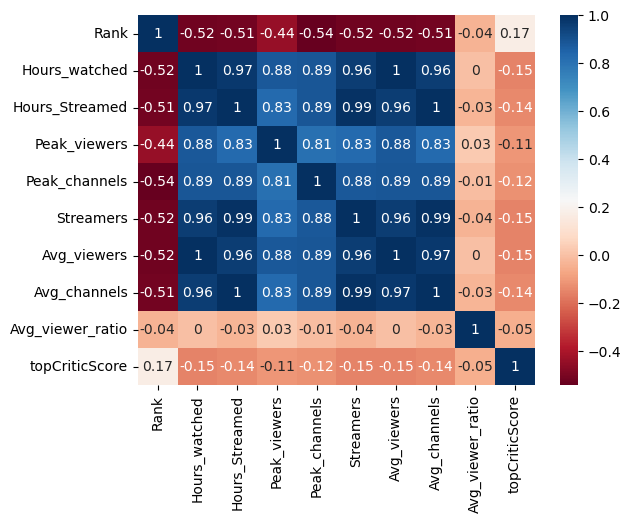

In [64]:
df_corr = df_raw.drop(['name','twitch_date','firstReleaseDate'], axis=1)
matrix = df_corr.corr().round(2)
sns.heatmap(matrix, annot=True, cmap = 'RdBu')
plt.show()

# Modeling

I decite to fit a Logistic Regression here, to show how the Twitch features could explain the TopCriticScore (target). To do this I just consider *Peak_viewers, Hours_watched and Streamers* Twitch features to avoid multicolinearity issues.

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from patsy import dmatrices

Before fit the model, I Group the dataframe by name and then get the max values of all features. The reason is to use the top values reached by the game in Twitch once the OpenCritic also use the top score.

In [160]:
#creating a new data-set with the best score of all features
top_features = df_raw.drop(['firstReleaseDate', 
                           'twitch_date', ], axis=1).groupby(['name']).max()
top_features['intercept']=1
top_features.head(10)

,Rank,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,topCriticScore,intercept
name,,,,,,,,,,,
Animal Crossing: New Horizons,139,30832827,519504,244171,4403,40068,41497,722,67.72,90,1
Astral Chain,128,875207,31579,30811,391,3352,1217,43,44.32,87,1
Celeste,197,708705,32004,170522,222,6406,1056,44,34.86,92,1
Crusader Kings III,138,7873053,102886,64778,803,8814,10950,143,76.52,90,1
Cuphead,197,6455811,175435,184477,900,46329,8688,236,75.18,88,1
DOOM Eternal,193,10275689,332177,140962,4196,48508,13829,447,30.93,89,1
Dark Souls III,108,17979317,749702,275893,3238,94233,25006,1042,120.80,90,1
Dead Cells,199,2448849,70860,64823,342,14910,3295,95,47.47,89,1
Death's Door,123,1350342,28499,54916,287,4463,1817,38,47.38,88,1


In [161]:
Y, X = dmatrices("topCriticScore ~ Peak_viewers + Hours_watched + Streamers" , top_features)

In [162]:
modelo = sm.OLS(Y , X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:         topCriticScore   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2.726
Date:                Thu, 01 Dec 2022   Prob (F-statistic):             0.0560
Time:                        14:34:48   Log-Likelihood:                -101.15
No. Observations:                  46   AIC:                             210.3
Df Residuals:                      42   BIC:                             217.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        89.2620      0.578    154.550

In [182]:
print(' Top Twitch games \n')
print(top_features.sort_values('Rank').head(5))
print('\n\n Top Open Critic games \n')
print(top_features.sort_values('topCriticScore', ascending=False).head(5))

 Top Twitch games 

                                         Rank  topCriticScore
name                                                         
Minecraft                                   5              90
Overwatch                                   5              90
Dark Souls III                              5              90
The Legend of Zelda: Breath of the Wild     7              96
Animal Crossing: New Horizons               8              90


 Top Open Critic games 

                                         Rank  topCriticScore
name                                                         
Super Mario Odyssey                        16              97
Red Dead Redemption 2                      10              96
The Legend of Zelda: Breath of the Wild     7              96
Hades                                      39              94
God of War                                  9              94


# Conclusion

Based on the R-squared: 0.163 we conclude that just 16.3% of TopCriticScore were explained by Twitch features. 

It means that a good professional review score doesn't mean that the game will be popular. Probably exists a lot of variables that rule the popularity of a game, let's take a look at the Top Twitch games and Top Open Critic games to get some insights on what they have in common.

* In Twitch's top games, there is a strong common trait: They're all COMPETITIVE games. My main hypothesis is that people want to reach their limits, be the best or watch the bests teaching. These games instigate you to be better, to win off/with your friends. And that's why they're so popular, we're fighting each other since we exist, but now we do this safely in our gamer's setups!

* On the other hand, the top Open Critic Games have another two comum patterns: they're from classic franchises (Super Mario, Zelda, God of War) or they are something disruptive (Hades, Red Dead Redemption 2). My Hypothesis is that these franchises have a time-proven 'cake recipe', they're testing what's worth and what's not over the years. They know the reviewer's taste, and they have resources to run MVPs before the launch. And no less importantly they have an emotional impact, this is a subjective and non-technical criteria, but we have great expectation of the classics and I believe this fact impact the Score. 

Finally, I could demonstrate driven by data and limited by our initial assumptions, that reviews have little impact on game popularity. And I've created some Hypotheses to explain why this happens, but this hypothesis still needs to be proven.

Any suggestions, mail me at: tadbc@hotmail.com